# NetworkX - Tutorial
From https://networkx.org/documentation/stable/tutorial.html

In [12]:
import networkx as nx
G = nx.Graph() # create empty graph

### Nodes

In [14]:
# add node to graph
G.add_node(1)

# add nodes from list
G.add_nodes_from([2, 3])

# add nodes with attributes
G.add_nodes_from([
    (4, {'color': 'red'}),
    (5, {'color': 'green'}),
])

# add nodes from one graph to the other
H = nx.path_graph(10)
G.add_nodes_from(H)

# or
G.add_node(H)

### Edges

In [15]:
# add edge
G.add_edge(1, 2)

# add edge as tuple
e = (2, 3)
G.add_edge(*e) # unpack/unzip tuple

# add edges from list
G.add_edges_from([(1, 2), (1, 3)])

# add edges from one graph to another
G.add_edges_from(H.edges)

In [16]:
# remove nodes and edges
G.clear()

# add new nodes/edges and ignore already present
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [17]:
# overview of graph
print(G.number_of_nodes())
print(G.number_of_edges())

8
3


In [19]:
# directed graph
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)

# checks that the directed graph is correctly constructed
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

### Examine graph

In [20]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [21]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [25]:
list(G.adj[1])
list(G.neighbors(1))

[2, 3]

In [26]:
G.degree(1)

2

In [28]:
G.edges([2,'m'])

EdgeDataView([(2, 1), ('m', 3)])

In [29]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

### Remove elements from Graph

In [33]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

In [34]:
G.remove_edge(1, 3)
list(G.edges)

[]

### Graph constructor

In [38]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
print(list(H.edges()))

edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
print(list(H.edges()))

[(1, 2), (2, 1)]
[(0, 1), (1, 2), (2, 3)]


### Accessing edges and neighbors

In [43]:
G = nx.Graph([(1, 2, {'color': 'yellow'})])
print(G[1][2])
print(G.edges[1, 2])

{'color': 'yellow'}
{'color': 'yellow'}


In [44]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

In [48]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [49]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


### Attributes nodes

In [50]:
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [51]:
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

In [52]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [55]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

### Attributes edges

In [56]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [58]:
G.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})])

### Directed graphs


In [59]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [60]:
DG.degree(1, weight='weight')

1.25

In [62]:
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

[2]
[2]


In [69]:
# graph from directed graph
H = nx.Graph(DG)
DG, H

(<networkx.classes.digraph.DiGraph at 0x15f7061bca0>,
 <networkx.classes.graph.Graph at 0x15f7061b160>)

### Multigraph

In [70]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [73]:
MG.edges.data()

MultiEdgeDataView([(1, 2, {'weight': 0.5}), (1, 2, {'weight': 0.75}), (2, 3, {'weight': 0.5})])

In [74]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

In [75]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

In [77]:
# other types of graph generation
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

In [78]:
# stochastic graphs examples
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

In [80]:
nx.write_gml(red, "example_graph")
mygraph = nx.read_gml("example_graph")

In [82]:
mygraph.edges.data()

EdgeDataView([('0', '1', {}), ('1', '2', {}), ('1', '171', {}), ('1', '174', {}), ('1', '180', {}), ('1', '185', {}), ('1', '193', {}), ('1', '201', {}), ('1', '208', {}), ('1', '214', {}), ('1', '215', {}), ('1', '222', {}), ('1', '238', {}), ('1', '239', {}), ('1', '266', {}), ('1', '275', {}), ('1', '284', {}), ('1', '291', {}), ('2', '3', {}), ('2', '299', {}), ('2', '303', {}), ('2', '317', {}), ('2', '339', {}), ('2', '341', {}), ('2', '344', {}), ('2', '360', {}), ('2', '375', {}), ('2', '382', {}), ('2', '389', {}), ('2', '425', {}), ('2', '433', {}), ('2', '440', {}), ('2', '447', {}), ('2', '457', {}), ('2', '471', {}), ('2', '474', {}), ('2', '493', {}), ('2', '515', {}), ('2', '518', {}), ('3', '4', {}), ('3', '533', {}), ('3', '536', {}), ('4', '5', {}), ('4', '556', {}), ('5', '6', {}), ('5', '559', {}), ('5', '564', {}), ('5', '568', {}), ('5', '569', {}), ('5', '574', {}), ('5', '578', {}), ('5', '595', {}), ('5', '605', {}), ('5', '617', {}), ('6', '7', {}), ('6', '630

### Analyzing graphs

In [84]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3)])
G.add_node('spam')
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [85]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [86]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [89]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

### Drawing graphs

In [90]:
import matplotlib.pyplot as plt

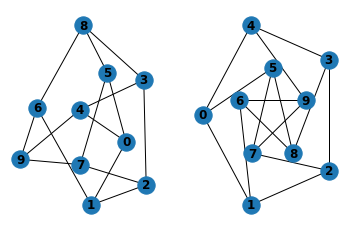

In [96]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5,10), range(5)], with_labels=True, font_weight='bold')
plt.show()

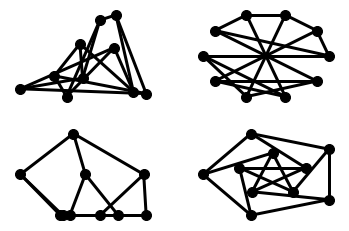

In [98]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}

subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)
plt.show()

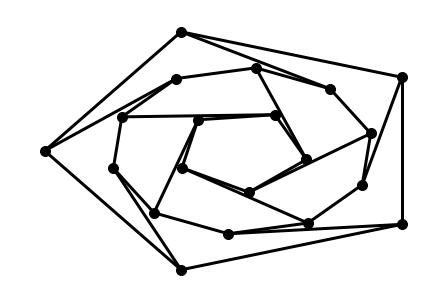

In [99]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

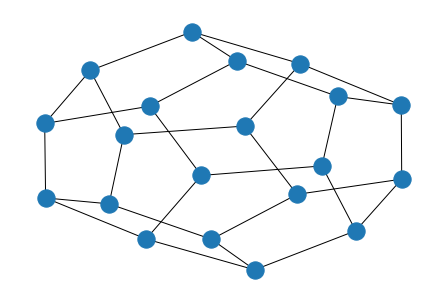

In [101]:
nx.draw(G)
plt.savefig("example_graph.png")